## 1. Загрузка данных и изучение общей информации

In [976]:
import pandas as pd
import seaborn as sns
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy as np
sns.set(rc={'figure.figsize':(10.7,6)})

pd.set_option('chained_assignment', None)

Загрузим все датасеты и по очереди посмотрим на каждый

In [977]:
calls_df = pd.read_csv('/datasets/calls.csv')
internet_df = pd.read_csv('/datasets/internet.csv', index_col='Unnamed: 0')
messages_df = pd.read_csv('/datasets/messages.csv')
tariffs_df = pd.read_csv('/datasets/tariffs.csv')
users_df = pd.read_csv('/datasets/users.csv')

In [978]:
calls_df.sample(5)

,id,call_date,duration,user_id
159467,1393_719,2018-05-07,0.00,1393
176221,1435_139,2018-06-07,17.89,1435
163358,1402_181,2018-11-11,3.58,1402
24177,1061_257,2018-11-07,7.57,1061
121167,1313_131,2018-12-10,14.76,1313


In [979]:
calls_df.isna().mean().apply("{:.1%}".format)

id           0.0%
call_date    0.0%
duration     0.0%
user_id      0.0%
dtype: object

In [980]:
calls_df.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,202607.0,6.755887,5.843365,0.0,1.3,6.0,10.7,38.0
user_id,202607.0,1253.940619,144.722751,1000.0,1126.0,1260.0,1379.0,1499.0


In [981]:
calls_df.dtypes

id            object
call_date     object
duration     float64
user_id        int64
dtype: object

In [982]:
internet_df.sample(5)

,id,mb_used,session_date,user_id
78515,1264_134,210.78,2018-04-25,1264
117552,1395_236,0.00,2018-11-09,1395
53080,1178_259,486.77,2018-06-20,1178
136453,1457_295,265.76,2018-11-15,1457
96679,1326_42,288.02,2018-06-09,1326


In [983]:
internet_df.isna().mean().apply("{:.1%}".format)

id              0.0%
mb_used         0.0%
session_date    0.0%
user_id         0.0%
dtype: object

In [984]:
internet_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mb_used,149396.0,370.192426,278.300951,0.0,138.1875,348.015,559.5525,1724.83
user_id,149396.0,1252.099842,144.050823,1000.0,1130.0000,1251.000,1380.0000,1499.00


In [985]:
internet_df.dtypes

id               object
mb_used         float64
session_date     object
user_id           int64
dtype: object

In [986]:
messages_df.sample(5)

,id,message_date,user_id
60894,1268_209,2018-10-26,1268
104357,1424_210,2018-10-17,1424
33681,1146_479,2018-11-13,1146
11416,1048_62,2018-09-04,1048
58712,1257_504,2018-12-15,1257


In [987]:
messages_df.isna().mean().apply("{:.1%}".format)

id              0.0%
message_date    0.0%
user_id         0.0%
dtype: object

In [988]:
messages_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,123036.0,1256.98941,143.523967,1000.0,1134.0,1271.0,1381.0,1499.0


In [989]:
messages_df.dtypes

id              object
message_date    object
user_id          int64
dtype: object

In [990]:
tariffs_df

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [991]:
users_df.sample(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
378,1378,21,NaN,Иркутск,Евгения,Бычкова,2018-01-19,smart
302,1302,43,NaN,Уфа,Владислав,Абаимов,2018-01-23,smart
470,1470,23,NaN,Новокузнецк,Эллада,Лосева,2018-10-19,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
356,1356,75,NaN,Москва,Евгений,Гончаров,2018-04-18,ultra


In [992]:
users_df.isna().mean().apply("{:.1%}".format)

user_id        0.0%
age            0.0%
churn_date    92.4%
city           0.0%
first_name     0.0%
last_name      0.0%
reg_date       0.0%
tariff         0.0%
dtype: object

In [993]:
users_df.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,500.0,1249.500,144.481833,1000.0,1124.75,1249.5,1374.25,1499.0
age,500.0,46.588,16.667630,18.0,32.00,46.0,62.00,75.0


In [994]:
users_df.dtypes

user_id        int64
age            int64
churn_date    object
city          object
first_name    object
last_name     object
reg_date      object
tariff        object
dtype: object

### Выводы

После загрузки и изучения общей информации можем сказать следующее:
 * Три из пяти загруженных датафреймов содержат от 100 до 200 тысяч записей
 * Пропуски есть только в одной колонке датафрейма users_df
 * Возможно, необходимо будет объединить некоторые датафреймы между собой для более удобной работы
 * Необходимо произвести преобразования типов в различных колонках

## 2. Преодработка данных

### Обработка пропусков

Пропущенные значения есть только в колонке churn_date датафрейма users_df. Пропуски объясняются тем фактом, что на момент выгрузки данных клиент не прекратил пользоваться тарифом. Пока что оставим пропущенные значения без изменений, если будет необходимо, то создадим колонку с категориальной переменной, отвечающей за текущий статус сипользования тарифа пользователем.

### Изменение используемых типов данных

Изменим типы данных для датафреймов в том же порядке, в котором мы их загружали. В датафрейме tariffs_df менять смысла нет, так как там всего две строчки и нет дат.

In [995]:
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'], format='%Y-%m-%d', errors='raise')
calls_df['duration'] = np.ceil(calls_df['duration']).astype('uint16')
calls_df['user_id'] = calls_df['user_id'].astype('uint16')

In [996]:
internet_df['mb_used'] = internet_df['mb_used'].astype('float16')
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'], format='%Y-%m-%d', errors='raise')
internet_df['user_id'] = internet_df['user_id'].astype('uint16')

In [997]:
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'], format='%Y-%m-%d', errors='raise')
messages_df['user_id'] = messages_df['user_id'].astype('uint16')

In [998]:
users_df['user_id'] = users_df['user_id'].astype('uint16')
users_df['age'] = users_df['age'].astype('uint8')
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'], format='%Y-%m-%d', errors='raise')

Проверим наличие дубликатов в датафрейме с пользователями

In [999]:
users_df.duplicated().sum()

0

### Выводы

Пропущенные значения оставили без изменений, поскольку они отвечают за дату прекращения клиентом использования тарифа.
Преобразовали типы данных для экономии используемой памяти.
Проверили датафрейм с пользователями на отсутствие дубликатов.

## 3. Расчеты и добавление результатов в таблицу

Добавим для каждого пользователя количество сделанных звонков за каждый месяц и количество израсходованным минут

In [1000]:
calls_df['month'] = calls_df['call_date'].dt.month

Для этого создадим сводную таблицу и посчитаем необходимые нам параметры

In [1001]:
f2 = lambda x: (x > 0).count()
    
f1 = lambda x: (x > 0).sum()

In [1002]:
grouped_calls = calls_df.copy()
grouped_calls = grouped_calls.query('duration > 0')
grouped_calls = grouped_calls.groupby(['user_id','month']).agg(minutes_sum=('duration','sum'), calls_count=('duration','count')).reset_index() 

In [1003]:
grouped_calls.sample(5)

,user_id,month,minutes_sum,calls_count
166,1025,8,444,52
2835,1448,12,471,44
612,1098,9,456,54
2637,1416,11,861,107
930,1149,10,261,30


Теперь посчитаем количество отправленных сообщений по месяцам для каждого пользователя

In [1004]:
messages_df['month'] = messages_df['message_date'].dt.month

In [1005]:
grouped_messages = messages_df.copy()
grouped_messages = grouped_messages.groupby(['user_id','month']).agg(messages_count=('id','count')).reset_index()

In [1006]:
grouped_messages.sample(5)

,user_id,month,messages_count
2234,1415,6,3
1369,1268,5,4
992,1187,11,63
948,1178,9,18
2506,1464,7,25


Посчитаем объем израсходованного интернет-трафика по месяцам для каждого пользователя

In [1007]:
internet_df['month'] = internet_df['session_date'].dt.month

In [1008]:
grouped_internet = internet_df.copy()
grouped_internet = grouped_internet.query('mb_used > 0')
grouped_internet = grouped_internet.groupby(['user_id','month']).agg(mb_sum=('mb_used','sum')).reset_index()

In [1009]:
grouped_internet.sample(5)

,user_id,month,mb_sum
1853,1293,10,7024.0
262,1043,8,19424.0
641,1101,7,8608.0
312,1050,8,25008.0
2553,1401,2,7880.0


Также необходимо округлить число использованных мегабайт до гигабайта, как это было указано в примечании

In [1010]:
grouped_internet['gb_sum'] = np.ceil(grouped_internet['mb_sum'] / 1024)

In [1011]:
grouped_internet.sample(5)

,user_id,month,mb_sum,gb_sum
1418,1222,12,24752.0,25.0
2203,1350,12,22368.0,22.0
960,1152,4,27840.0,28.0
1183,1185,6,39200.0,39.0
1539,1243,7,26384.0,26.0


Соединим между собой датафреймы users_df, grouped_calls, grouped_messages и grouped_internet

In [1012]:
df = grouped_calls.merge(grouped_messages, how='outer', on=['user_id', 'month'])

In [1013]:
df = df.merge(grouped_internet, how='outer', on=['user_id', 'month'])

In [1014]:
df = df.merge(users_df, how='right', on='user_id')

Посмотрим сколько клиентов не пользовались услугами связи и интернета

In [1015]:
(df['month'].isna()).sum()

2

Таких клиентов всего 2

Посчитаем помесячную выручку с каждого пользователя. 

Для этого вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножим на значение из тарифного плана; прибавим абонентскую плату, соответствующую тарифному плану).

In [1016]:
tariffs_df = tariffs_df.rename(columns={'tariff_name': 'tariff'}, errors='raise')
df = df.merge(tariffs_df, how='inner', on='tariff')

In [1017]:
def get_profit(row, service_type, price, service_s, div):
    smart_min = row[service_type] / div
    smart_price = row[price]
    ultra_min = row[service_type] / div
    ultra_price = tariffs_df.loc[1, price]
    
    tarif = row['tariff']
    service_sum = row[service_s]
    if tarif == 'smart':
        delta = service_sum - smart_min
        if delta > 0:
            return delta * smart_price
        return 0
    if tarif == 'ultra':
        delta = service_sum - ultra_min
        if delta > 0:
            return delta * ultra_price
        return 0

Посчитаем прибыль по каждому пользователю в зависимости от тарифа

In [1018]:
df['min_profit'] = df.apply(get_profit, args=('minutes_included', 'rub_per_minute', 'minutes_sum', 1), axis=1)
df['msg_profit'] = df.apply(get_profit, args=('messages_included', 'rub_per_message', 'messages_count', 1), axis=1)
df['gb_profit'] = df.apply(get_profit, args=('mb_per_month_included', 'rub_per_gb', 'gb_sum', 1024), axis=1)

Добавим также ежемесячный платеж по тарифу

In [1019]:
def get_fee_profit(row):
    smart_fee = tariffs_df.loc[0, 'rub_monthly_fee']
    ultra_fee = tariffs_df.loc[1, 'rub_monthly_fee']
    tarif = row['tariff']
    
    if tarif == 'smart':
        return smart_fee
    if tarif == 'ultra':
        return ultra_fee

In [1020]:
df['fee_profit'] = df.apply(get_fee_profit, axis=1)

### Выводы
Общие выводы и результаты:
* только 2 клиента из 500 не пользовались никакими услугами связи
* Посчитали использование услуг связи по месяца для каждого пользователя и объединили сводные таблицы в одну

## 4. Анализ данных

Посчитаем среднее, дисперсию и стандартное отклонение для каждого из тарифов по использованию интернета, звонкам и сообщениям

In [1021]:
statistic_pivot = pd.pivot_table(df, index=['tariff'], values=['minutes_sum', 'calls_count', 'messages_count', 'gb_sum'], aggfunc=['mean', np.var, np.std])
statistic_pivot = statistic_pivot.stack().reset_index()
statistic_pivot.columns = ['Тариф', 'Исп. услуга', 'Среднее', 'Дисперсия', 'Станд. отклонение']
statistic_pivot.sort_values(by='Исп. услуга', ascending=False)

,Тариф,Исп. услуга,Среднее,Дисперсия,Станд. отклонение
3,smart,minutes_sum,419.440342,35718.128534,188.992403
7,ultra,minutes_sum,547.755016,93338.428291,305.513385
2,smart,messages_count,38.716441,717.594201,26.787949
6,ultra,messages_count,61.161006,2109.659183,45.931026
1,smart,gb_sum,16.336777,32.801178,5.727231
5,ultra,gb_sum,19.707392,93.810493,9.685582
0,smart,calls_count,47.116614,436.270629,20.887092
4,ultra,calls_count,61.613516,1168.901212,34.189197


Видим, что клиенты с тарифом ultra в среднем разговаривают больше, отправляют больше сообщений и больше пользуются Интернетом. 

При этом, с тарифом ultra стандартное отклонение в полтора раза больше, чем с тарифом smart, значит у клиентов с тарифом ultra больше разброс значений вокруг среднего по выбранным параметрам использования.

Посмотрим на распределения использования каждого из параметров в зависимости от тарифа

In [1022]:
df.fillna(0, inplace=True)

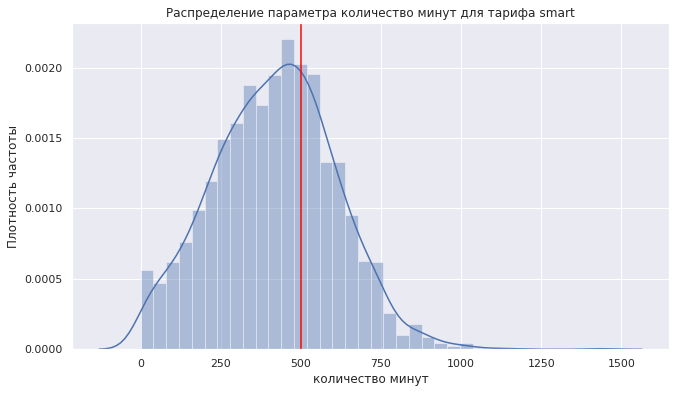

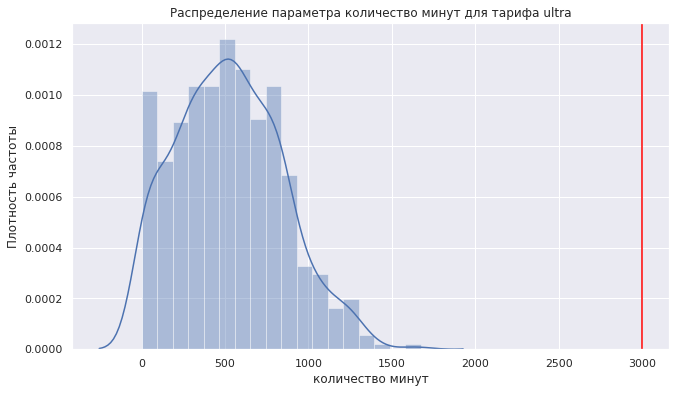

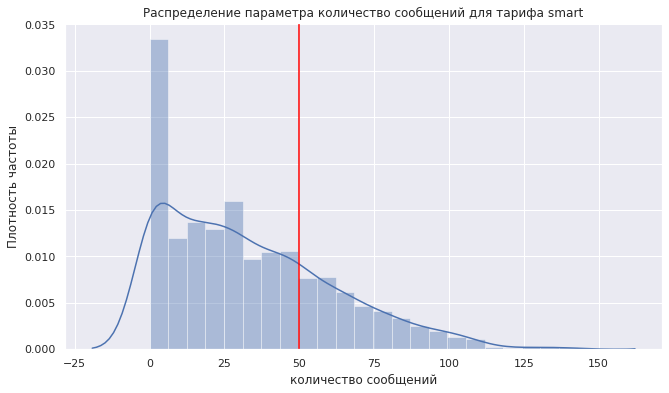

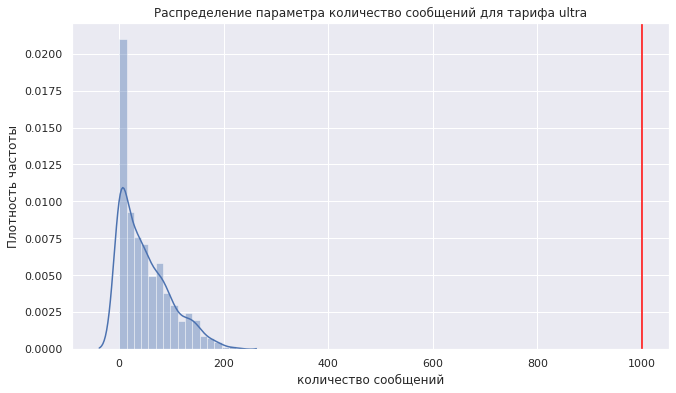

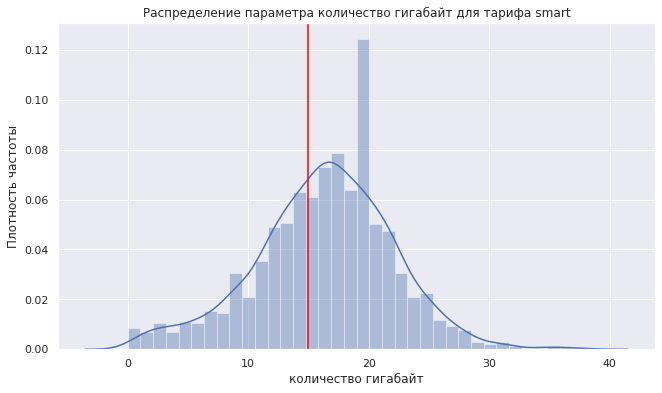

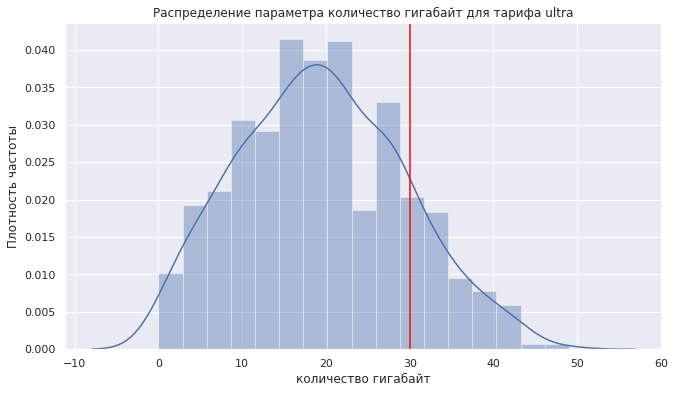

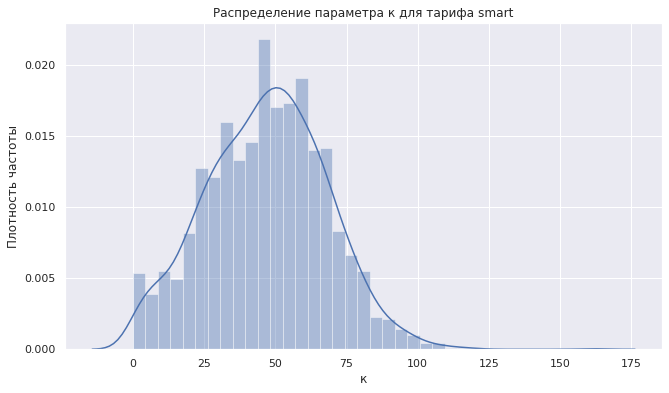

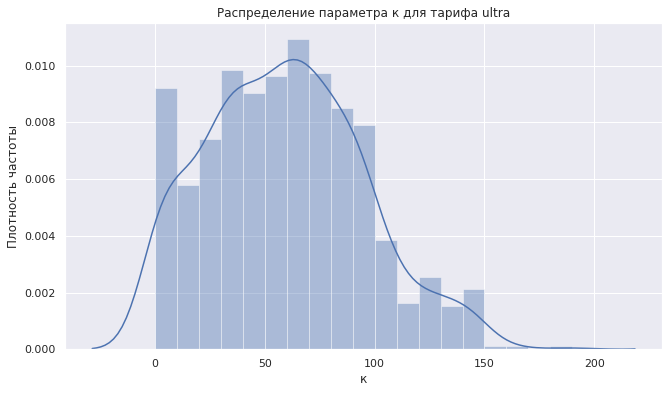

In [1023]:
distplot_cols = {'minutes_sum': ['количество минут', 500, 3000], 'messages_count': ['количество сообщений', 50, 1000],\
                 'gb_sum': ['количество гигабайт', 15360/1024, 30720/1024], 'calls_count': 'количество звонков'}
tarif_list = ['smart', 'ultra']
for col in distplot_cols:
    for tarif in tarif_list:
            ax = sns.distplot(df[df['tariff'] == tarif][col])
            name = 'Распределение параметра ' + distplot_cols[col][0] + ' для тарифа ' + tarif
            ax.set(xlabel=distplot_cols[col][0], ylabel='Плотность частоты', title=name)
            if col != 'calls_count':
                if tarif == 'smart':
                    plt.axvline(distplot_cols[col][1], color='red')
                else:
                    plt.axvline(distplot_cols[col][2], color='red')
            plt.show()

### Выводы

Клиенты с тарифом ultra в среднем превосходят клиентов с тарифом smart по объему используемых услуг. 
Распределения некоторых услуг по своей форме напоминают нормальное распределение, а распределение количества сообщений похоже на распределение Пуассона. Также наблюдаются экстремальные значения частоты для некоторых параметров

## 5. Проверка гипотез

Проверим гипотезу о том, что средняя выручка пользователей тарифов ultra и smart различаются.
Для проверки гипотез выберем стандартный критический уровень статистической значимости равный 0.05. Поскольку выборки независимые, используем тест для независимых выборок.

**$H_0$**: средняя выручка для пользователей тарифов ultra и smart не различается

**$H_1$**: средняя выручка для пользователей тарифов ultra и smart различается

In [1024]:
df['sum_profit'] = df['min_profit'] + df['msg_profit'] + df['gb_profit'] + df['fee_profit']
mean_smart = df[df['tariff'] == 'smart']['sum_profit'].mean()
mean_ultra = df[df['tariff'] == 'ultra']['sum_profit'].mean()

In [1025]:
alpha = 0.05
results = st.ttest_ind(df[df['tariff'] == 'smart']['sum_profit'], df[df['tariff'] == 'ultra']['sum_profit'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 3.518266427086176e-251
Отвергаем нулевую гипотезу


И посмотрим на средние значения выручки по каждому из тарифов

In [1026]:
print(f'Средняя выручка по тарифу smart: {mean_smart}')
print(f'Средняя выручка по тарифу ultra: {mean_ultra}')

Средняя выручка по тарифу smart: 1288.5654708520178
Средняя выручка по тарифу ultra: 2069.8782961460447


Видим что среднее значение прибыли по тарифу ultra более чем в полтора раза выше, чем по тарифу smart, у нас есть основания для принятия альтернативной гипотезы.

Так же проверим средние значения выручки по клиентам из Москвы и клиентам из других регионов. Тип теста и уровень статистической значимости оставим без изменений.

**$H_0$**: средняя выручка для клиентов в Москве и остальных городах не различается

**$H_1$**: средняя выручка для клиентов в Москве и остальных городах различается

In [1027]:
profit_moscow = df.query('city.isin(["Москва"])')['sum_profit'].mean()
profit_other = df.query('~city.isin(["Москва"])')['sum_profit'].mean()

In [1028]:
results = st.ttest_ind(df.query('city.isin(["Москва"])')['sum_profit'], df.query('~city.isin(["Москва"])')['sum_profit'], equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5242559985967266
Не получилось отвергнуть нулевую гипотезу


In [1029]:
print(f'Средняя выручка по клиентам из Москвы: {profit_moscow}')
print(f'Средняя выручка по клиентам из других городов: {profit_other}')

Средняя выручка по клиентам из Москвы: 1545.8134206219313
Средняя выручка по клиентам из других городов: 1523.9573896353168


Нам не удалось отвергнуть нулевую гипотезу и мы видимо что средние значения выручки не сильно отличаются для Москвы и других городов

# Общий вывод

Вывод по данным:
 * Данные собраны хорошо, пропущенных значений нет
 * Пришлось изменить используемый тип данных в колонках для экономии занимаемой памяти

Вывод по результатам анализа:
 * Распределения использования некоторых услуг близки к нормальному, так и же и присутствуют явные пики частоты некоторых значение
 * 2 клиента не пользовались услугами связи
 * В среднем клиенты с тарифом ultra больше пользуются услугами связи, чем клиенты с тарифом smart
 * Приняли альтернативную гипотезу о том, что средняя выручка для пользователей тарифов ultra и smart различается и убедились в разнице средних значений
 * Не смогли отвергнуть нулевую гипотезу о том, что средняя выручка для клиентов в Москве и остальных городах не различается и убедились в небольшой разнице между средними значениями прибыли от клиентов
 * По результатам сравнения наиболее прибыльным является тариф ultra, так как не смотря на переплаты при превышении лимита, входящего в тариф smart, прибыль от клиентов с тарифом ultra все равно выше